# import required tools

In [ ]:
#data analysis
import pandas as pd 
from pandas.plotting  import scatter_matrix ## for correlation plotting 
import numpy as np 
#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# 1:Discoverand visualize the data to gain insights

In [ ]:
#read training data by path 
train_data=pd.read_csv(r'C:\Users\aa\Desktop\TITANIC_TASK\train.csv')
test_data=pd.read_csv(r'C:\Users\aa\Desktop\TITANIC_TASK\test.csv')

In [ ]:
# print first 5 rows 
train_data.head(18)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
#Summary of each numerical attribute
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#the  data types and non-missing values
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
# call missing values fun 
missing_values_table(train_data)


Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2


In [ ]:
# find out what categories exist
train_data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
D              3
              ..
E46            1
C106           1
A32            1
E68            1
E10            1
Name: Cabin, Length: 147, dtype: int64

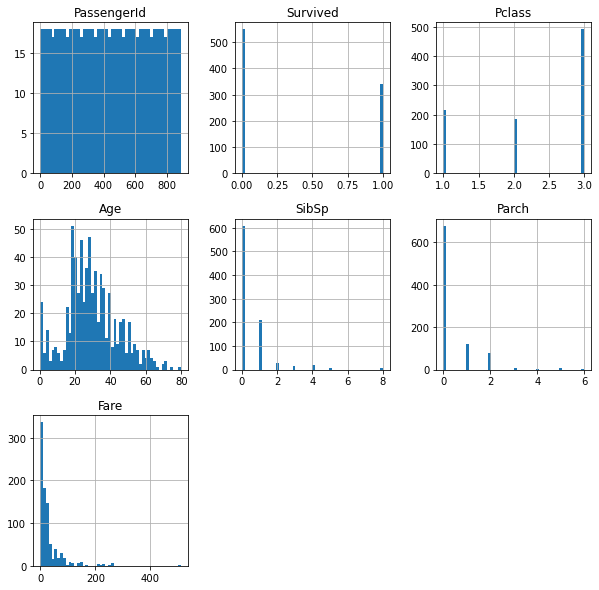

In [ ]:
# visualize data  
train_data.hist( bins=50, figsize=(10,10), grid=True)
plt.show()


# 2:Data cleaning and formating 


In [ ]:
## get ride of missing values in age and formate it \\ train
age_median=train_data['Age'].median()
train_data['Age'].fillna(age_median,inplace=True)

In [ ]:
## get ride of missing values in age and formate it  \\ test  the same median of train 
age_median2=test_data['Age'].median()
test_data['Age'].fillna(age_median,inplace=True)


In [ ]:
combine = [train_data, test_data]

In [ ]:

for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,2.0,0,0,373450,8.0500,NaN,S


In [ ]:
## transfer gender to numrrical type 
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,S


In [ ]:
# get ride of missing values of embarked 
freq_port = train_data.Embarked.dropna().mode()[0]
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

In [ ]:
## transfer Embarked to numrrical type
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,2.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0


# 3:Exploratory data analysis


In [ ]:
train_data.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Sex            0.543351
Age           -0.065770
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Embarked       0.106811
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Age', ylabel='Age'>,
        <AxesSubplot:xlabel='Survived', ylabel='Age'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Age'>,
        <AxesSubplot:xlabel='Sex', ylabel='Age'>],
       [<AxesSubplot:xlabel='Age', ylabel='Survived'>,
        <AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Survived'>,
        <AxesSubplot:xlabel='Sex', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Age', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Survived', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Pclass'>,
        <AxesSubplot:xlabel='Sex', ylabel='Pclass'>],
       [<AxesSubplot:xlabel='Age', ylabel='Sex'>,
        <AxesSubplot:xlabel='Survived', ylabel='Sex'>,
        <AxesSubplot:xlabel='Pclass', ylabel='Sex'>,
        <AxesSubplot:xlabel='Sex', ylabel='Sex'>]], dtype=object)

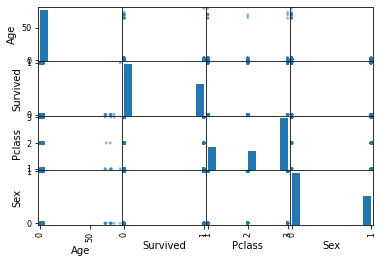

In [ ]:
## plot corr 
attributes=['Age','Survived','Pclass','Sex']
scatter_matrix(train_data[attributes])


 ###  4:Feature engineering and selection

In [ ]:
test_data = test_data.drop(["PassengerId",'Cabin','Ticket','Name'], axis=1)
train_data = train_data.drop(["PassengerId",'Cabin','Ticket','Name'], axis=1)

In [ ]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,2.0,0,0,7.8292,2
1,3,1,2.0,1,0,7.0000,0
2,2,0,3.0,0,0,9.6875,2
3,3,0,1.0,0,0,8.6625,0
4,3,1,1.0,1,1,12.2875,0


In [ ]:
combine = [train_data, test_data]
combine

[     Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
 0           0       3    0  1.0      1      0   7.2500         0
 1           1       1    1  2.0      1      0  71.2833         1
 2           1       3    1  1.0      0      0   7.9250         0
 3           1       1    1  2.0      1      0  53.1000         0
 4           0       3    0  2.0      0      0   8.0500         0
 ..        ...     ...  ...  ...    ...    ...      ...       ...
 886         0       2    0  1.0      0      0  13.0000         0
 887         1       1    1  1.0      0      0  30.0000         0
 888         0       3    1  1.0      1      2  23.4500         0
 889         1       1    0  1.0      0      0  30.0000         1
 890         0       3    0  1.0      0      0   7.7500         2
 
 [891 rows x 8 columns],
      Pclass  Sex  Age  SibSp  Parch      Fare  Embarked
 0         3    0  2.0      0      0    7.8292         2
 1         3    1  2.0      1      0    7.0000         0
 2        

#  5:Model, predict and solve

In [ ]:
fare_median2=test_data['Fare'].median()
test_data['Fare'].fillna(fare_median2,inplace=True)


In [ ]:
features = train_data.drop("Survived", axis=1)
label= train_data["Survived"]
test  = test_data

In [ ]:
missing_values_table(test )

Your selected dataframe has 7 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [ ]:
 #Logistic Regression
# machine learning
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(features, label)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.91

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(features, label)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(features, label) * 100, 2)
acc_knn

86.42

In [ ]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(features, label)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(features, label) * 100, 2)
acc_gaussian

78.11